# Baseline examples

Charles Le Losq

August 2017; updated March 2025

Examples of using the baseline function with various algorithms (splines, polynomials, ALS, arPLS...)

## Documentation

See http://charlesll.github.io/Spectra.jl/stable/ for information about spectra.

## References

a good read about the ALS and arPLS algorithms is 

    Baek, S.-J., A. Park, Y.-J. Ahn, and J. Choo (2015), Baseline correction using asymmetrically reweighted penalized least squares smoothing, Analyst, 140(1), 250–257, doi:10.1039/C4AN01061B.

## Importing the relevant libraries

In [6]:
# The Julia library to treat Raman spectroscopy data
using Spectra

# to plot stuffs
using Plots; gr()

# we need the Random library
using Random

## Creating a fake signal to know the ground truth

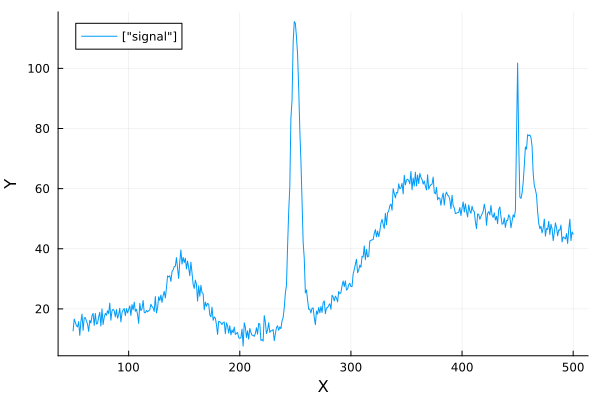

In [7]:
x = collect(50:1.0:500)

# 5 gaussian peaks
p1 = 20.0 .* exp.(-log(2) .* ((x .-150.0)./15.0).^2)
p2 = 100.0 .* exp.(-log(2) .* ((x .-250.0)./5.0).^2)
p3 = 50.0 .* exp.(-log(2) .* ((x .-450.0)./1.0).^2)
p4 = 20.0 .* exp.(-log(2) .* ((x .-350.0)./30.0).^2)
p5 = 30.0 .* exp.(-log(2) .* ((x .-460.0)./5.0).^2)

# some background: a large gaussian + linear 
bkg = 10.0 .* sin.(x./50.0) + 0.1.*x

# some noise
noise = 2.0 * randn!(ones(size(x,1)))

# the observation
y = p1 + p2 + p3 + p4 + p5 + noise +bkg

# making a plot
p1 = plot(x, y, label=["signal"], xlabel="X", ylabel="Y")
display(p1)

## Calling the baseline() function to remove the background

see documentation at http://charlesll.github.io/Spectra.jl/stable/PreProcessing/#baseline-subtraction

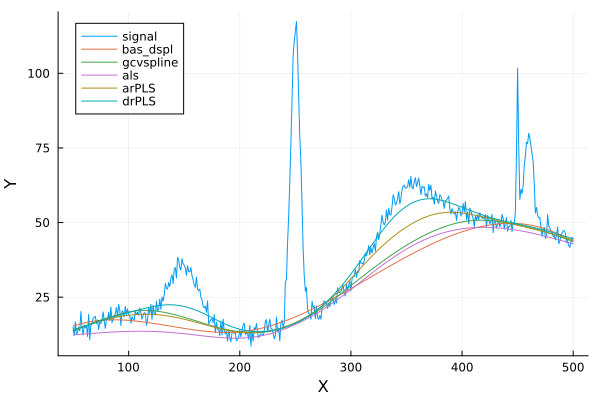

In [26]:
# We define the portions of the spectra where we want to fit the signal background.
# roi should be an n x 2 array, see documentation at 
roi = [0 100.; 200 220; 280 290; 420 430; 480 490]

# caling the baseline function with a natural spline that will fit the signal in ROIs
y_dspl, bas_dspl = baseline(x, vec(y), roi = roi, method = "Dspline", s=1.3)

# caling the baseline function with a natural spline that will fit the signal in ROIs
y_gcvspl, bas_gcvspl = baseline(x, vec(y), roi = roi, method = "gcvspline")

# using the ALS algorithm (Baek et al. 2015), 10^2-10^5 lambda and 0.001-0.1 p values are recommended
y_als, bas_als = baseline(x, y, roi = roi,method = "als", p=0.01, lam=10^5, niter=10)

# using the arPLS algorithm (Baek et al. 2015)
y_arpls, bas_arpls = baseline(x, y, method = "arPLS", p=0.01, lam=10.0^6, ratio=0.01)

# using the drPLS algorithm (Baek et al. 2015)
y_drpls, bas_drpls = baseline(x, y, method = "drPLS", ratio=0.1, lam=10.0^6)

# plotting the initial signal and the roi
plot(x, y, label="signal", xlabel="X", ylabel="Y")
plot!(x, [bas_dspl, bas_gcvspl, bas_als, bas_arpls, bas_drpls], labels=["bas_dspl" "gcvspline" "als" "arPLS" "drPLS"])

In [10]:
p = sortperm(x)


451-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 440
 441
 442
 443
 444
 445
 446
 447
 448
 449
 450
 451

In [11]:
x[p]

451-element Vector{Float64}:
  50.0
  51.0
  52.0
  53.0
  54.0
  55.0
  56.0
  57.0
  58.0
  59.0
  60.0
  61.0
  62.0
   ⋮
 489.0
 490.0
 491.0
 492.0
 493.0
 494.0
 495.0
 496.0
 497.0
 498.0
 499.0
 500.0